In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [25]:
df =pd.read_csv('/content/gdrive/My Drive/30%_new data/Plasma2021_non_severe.csv')
# df=df.set_index("Protein IDs")
# df_t=df.T
df


,Protein IDs,NSOP_13,NSOP_15,OP1,OP10,OP19,OP2,OP20,OP21,OP3,OP4,OP5,OP6,OP7,OP8,OP9,SOP28,SOP29,SOP30,SOP31,SOP32,SOP35,SOP36,SOP38
0,NaN,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe
1,P62851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,P22392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5471200,0,0,0
3,O60869,0,0,0,0,0,0,420140,0,0,0,0,0,0,0,0,0,0,0,0,12349000,0,0,0
4,Q9H0K6,5865400,3445900,9311000,6671700,3153200,0,2271500,2116400,7179200,11305000,3913800,0,0,0,10212000,0,12084000,7394300,42886000,0,77495000,5587100,37486000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Q92752,0,0,0,1619800,0,0,0,0,0,0,0,0,1469400,0,0,0,0,0,0,0,0,0,0
1305,Q99798,0,0,1643500,0,0,0,0,0,1688100,0,0,0,0,0,0,0,0,0,0,100710,0,0,0
1306,Q9BUF5,0,0,0,2168100,54280000,11835000,34641000,33676000,11168000,1256600,0,0,0,0,1764200,28229000,0,0,905770,14863000,0,0,0
1307,Q9BVA1,0,169230,183560000,0,0,0,88792,0,72399000,244700,0,0,0,0,0,0,377750,0,2194600,1058100,818400,854160,0


In [26]:
df.replace('0', np.nan, inplace=True)
df

,Protein IDs,NSOP_13,NSOP_15,OP1,OP10,OP19,OP2,OP20,OP21,OP3,OP4,OP5,OP6,OP7,OP8,OP9,SOP28,SOP29,SOP30,SOP31,SOP32,SOP35,SOP36,SOP38
0,NaN,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe
1,P62851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P22392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5471200,NaN,NaN,NaN
3,O60869,NaN,NaN,NaN,NaN,NaN,NaN,420140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12349000,NaN,NaN,NaN
4,Q9H0K6,5865400,3445900,9311000,6671700,3153200,NaN,2271500,2116400,7179200,11305000,3913800,NaN,NaN,NaN,10212000,NaN,12084000,7394300,42886000,NaN,77495000,5587100,37486000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Q92752,NaN,NaN,NaN,1619800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1469400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,Q99798,NaN,NaN,1643500,NaN,NaN,NaN,NaN,NaN,1688100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100710,NaN,NaN,NaN
1306,Q9BUF5,NaN,NaN,NaN,2168100,54280000,11835000,34641000,33676000,11168000,1256600,NaN,NaN,NaN,NaN,1764200,28229000,NaN,NaN,905770,14863000,NaN,NaN,NaN
1307,Q9BVA1,NaN,169230,183560000,NaN,NaN,NaN,88792,NaN,72399000,244700,NaN,NaN,NaN,NaN,NaN,NaN,377750,NaN,2194600,1058100,818400,854160,NaN


<BarContainer object of 23 artists>

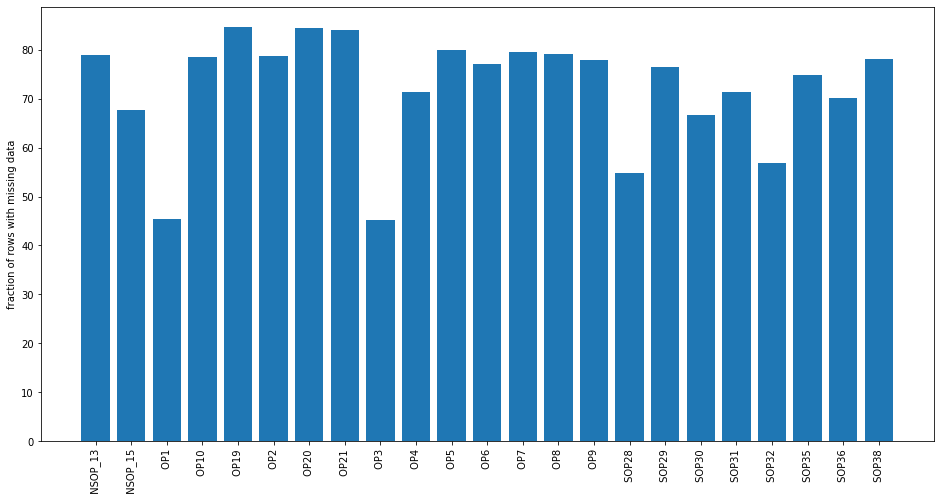

In [27]:
null_counts = df.isnull().sum()[1:]/len(df[1:])*100
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [28]:
df.isnull().sum()[1:]

 NSOP_13    1033
 NSOP_15     885
 OP1         593
 OP10       1026
 OP19       1106
 OP2        1029
 OP20       1103
 OP21       1099
 OP3         591
 OP4         932
 OP5        1044
 OP6        1009
 OP7        1040
 OP8        1035
 OP9        1019
 SOP28       718
 SOP29      1001
 SOP30       872
 SOP31       934
 SOP32       744
 SOP35       979
 SOP36       917
 SOP38      1020
dtype: int64

In [29]:
d1={'Patient Ids':df.columns[1:],'Null_counts':df.isnull().sum()[1:]}
df_n=pd.DataFrame(d1)
df_n

,Patient Ids,Null_counts
NSOP_13,NSOP_13,1033
NSOP_15,NSOP_15,885
OP1,OP1,593
OP10,OP10,1026
OP19,OP19,1106
OP2,OP2,1029
OP20,OP20,1103
OP21,OP21,1099
OP3,OP3,591
OP4,OP4,932


In [38]:
df.isnull().sum(axis=1)

0        1
1       23
2       22
3       21
4        6
        ..
1304    21
1305    20
1306    12
1307    13
1308    16
Length: 1309, dtype: int64

In [44]:
len(df.T)

24

In [45]:
d={'Proteins':df['Protein IDs'],'Null_counts_1':df[1:].isnull().sum(axis=1),"percentage":(df[1:].isnull().sum(axis=1)/23)*100 }
df_null = pd.DataFrame(d)
df_null[1:]

,Proteins,Null_counts_1,percentage
1,P62851,23.0,100.000000
2,P22392,22.0,95.652174
3,O60869,21.0,91.304348
4,Q9H0K6,6.0,26.086957
5,Q14974,18.0,78.260870
...,...,...,...
1304,Q92752,21.0,91.304348
1305,Q99798,20.0,86.956522
1306,Q9BUF5,12.0,52.173913
1307,Q9BVA1,13.0,56.521739


In [47]:
df_null[1:].to_csv("/content/gdrive/My Drive/protein_wise_nonsevere_nullcounts.csv")

In [ ]:
df_null.max()

Null_counts    23
dtype: int64

In [ ]:
df_null[df_null['Null_counts']==23]

,Proteins,Null_counts
1,P62851,23
9,Q86X29,23
10,Q5SYC1,23
11,Q86Y82,23
13,Q9Y623,23
...,...,...
1067,P52566,23
1087,P37840,23
1103,Q9UQM7,23
1273,P43004,23


In [ ]:
df_t=df.T
df_t

,0,1,2,3,4,5,6,7,8,9,...,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Protein IDs,NaN,P62851,P22392,O60869,Q9H0K6,Q14974,Q96RW7,P47897,O95399,Q86X29,...,Q16555,Q16658,Q5VTE0,Q6W4X9,Q71U36,Q92752,Q99798,Q9BUF5,Q9BVA1,Q9P2E9
NSOP_13,Non Severe,NaN,NaN,NaN,5865400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80530,NaN,NaN,NaN,NaN,NaN
NSOP_15,Non Severe,NaN,NaN,NaN,3445900,NaN,NaN,NaN,1487200,NaN,...,539540,3106600,2811600,NaN,4594400,NaN,NaN,NaN,169230,NaN
OP1,Non Severe,NaN,NaN,NaN,9311000,3374700,NaN,NaN,23681000,NaN,...,55244000,368010000,78463000,NaN,315730000,NaN,1643500,NaN,183560000,NaN
OP10,Non Severe,NaN,NaN,NaN,6671700,NaN,26332000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,183870,1619800,NaN,2168100,NaN,NaN
OP19,Non Severe,NaN,NaN,NaN,3153200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,368670,NaN,139680,NaN,NaN,54280000,NaN,996840
OP2,Non Severe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,552480,NaN,NaN,11835000,NaN,NaN
OP20,Non Severe,NaN,NaN,420140,2271500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,122640,NaN,NaN,34641000,88792,NaN
OP21,Non Severe,NaN,NaN,NaN,2116400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,123790,NaN,NaN,33676000,NaN,NaN
OP3,Non Severe,NaN,NaN,NaN,7179200,2807200,NaN,NaN,6819200,NaN,...,71677000,45656000,93877000,NaN,281270000,NaN,1688100,11168000,72399000,NaN


In [ ]:
P_id=df['Protein IDs'].to_numpy()
T=df.index.to_numpy()
p=df_t[0].to_numpy()
I=df_t.index.to_numpy()
keys = I
vals = p
d2=dict(zip(keys, zip(vals)))
keys_p=P_id
vals_p=T
d3=dict(zip(keys_p,zip(vals_p)))


In [ ]:
def getprotein_col_index(ProteinIDs):
    protein_id_column_index=d3[ProteinIDs][0]
    return protein_id_column_index

In [ ]:
getprotein_col_index('P62851')
len(df_t.isnull()[1:])

23

In [ ]:
def getprotein_intensity(protein_id_column_index,patient_id):
    
    return df_t[protein_id_column_index][patient_id]   

In [ ]:
df_t.isnull()[2]

Protein IDs    False
 NSOP_13        True
 NSOP_15        True
 OP1            True
 OP10           True
 OP19           True
 OP2            True
 OP20           True
 OP21           True
 OP3            True
 OP4            True
 OP5            True
 OP6            True
 OP7            True
 OP8            True
 OP9            True
 SOP28          True
 SOP29          True
 SOP30          True
 SOP31          True
 SOP32         False
 SOP35          True
 SOP36          True
 SOP38          True
Name: 2, dtype: bool

In [ ]:
def get_nonseverepatientids_intensity(protein_col_index):
    non_severe={}   
    true_values=[]
    false_values=[]
    k=df_t.isnull()[protein_col_index].to_numpy()
    for i in range(1,24):

        if(k[i]==True):
            true_values.append(df_t.isnull()[protein_col_index].index[i])
        elif(k[i]==False):
            false_values.append(df_t.isnull()[protein_col_index].index[i])
    for j in range(0,len(false_values)):
        patientid=false_values[j]
        if(d2[patientid][0]=='Non Severe'):
            intensity=getprotein_intensity(protein_col_index,patientid)
            non_severe[patientid]=intensity
    return non_severe

In [ ]:
def check_no_of_nonsevere(protein_id):
    non_severe=[]
    protein_col_index=getprotein_col_index(protein_id)
    true_values=[]
    k=df_t.isnull()[protein_col_index].to_numpy()
    for i in range(1,24):
        if(k[i]==True):
            true_values.append(df_t.isnull()[protein_col_index].index[i])
    for j in range(0,len(true_values)):

        patientid=true_values[j]
        if(d2[patientid][0]=='Non Severe'):
            non_severe.append(patientid)
    return int(len(non_severe))


In [ ]:
def null_data_frame_nonsevere(protein_id):
    protein_col_index=getprotein_col_index(protein_id)
    non_severe_patients=get_nonseverepatientids_intensity(protein_col_index)
    non_severe_patients_list=list(non_severe_patients.items())
    df_non_severe=pd.DataFrame(non_severe_patients_list)
    df_non_severe.columns=['non_severe_patient_ids','Protein Intensity_ns']
    df_non_severe.index=[protein_id]*len(df_non_severe['non_severe_patient_ids'])
    return df_non_severe

In [ ]:
null_data_frame_nonsevere('Q9H0K6')

,non_severe_patient_ids,Protein Intensity_ns
Q9H0K6,NSOP_13,5865400
Q9H0K6,NSOP_15,3445900
Q9H0K6,OP1,9311000
Q9H0K6,OP10,6671700
Q9H0K6,OP19,3153200
Q9H0K6,OP20,2271500
Q9H0K6,OP21,2116400
Q9H0K6,OP3,7179200
Q9H0K6,OP4,11305000
Q9H0K6,OP5,3913800


In [ ]:
def no_of_nonsevere_count(protein_id):
    d_missingnumbers=[]
    d_missingnumbers=[int(check_no_of_nonsevere(protein_id))]
    return d_missingnumbers

In [ ]:
Protein_id=[]
no_of_nonsevere=[]
for i in df_null[df_null['Null_counts']>=8]['Proteins']:
  
    Protein_id.append(i)
    no_of_nonsevere.append(int(no_of_nonsevere_count(i)[0]))
array=np.array([Protein_id,no_of_nonsevere])
df_missingvalues=pd.DataFrame(array)
df_missingvalues_t=df_missingvalues.T
df_missingvalues_t.columns=['Protein_id','no_of_nonsevere']
df_missingvalues_t

,Protein_id,no_of_nonsevere
0,P62851,23
1,P22392,22
2,O60869,21
3,Q14974,18
4,Q96RW7,20
...,...,...
1088,Q92752,21
1089,Q99798,20
1090,Q9BUF5,12
1091,Q9BVA1,13


In [ ]:
Proteins_to_remove=df_missingvalues_t[(df_missingvalues_t['no_of_nonsevere'].astype(int) >= 8)]['Protein_id'].to_numpy()

In [ ]:
len(Proteins_to_remove)

1093

In [ ]:
ins=[]
for i in range(len(Proteins_to_remove)):
    ins.append(getprotein_col_index(Proteins_to_remove[i]))
ins

[1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,

In [ ]:
for i in range(0,len(Proteins_to_remove)):
    index_to_remove=getprotein_col_index(Proteins_to_remove[i])
    df.drop(index_to_remove,axis=0,inplace=True)

In [ ]:
df

,Protein IDs,NSOP_13,NSOP_15,OP1,OP10,OP19,OP2,OP20,OP21,OP3,...,OP8,OP9,SOP28,SOP29,SOP30,SOP31,SOP32,SOP35,SOP36,SOP38
0,NaN,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,...,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe,Non Severe
4,Q9H0K6,5865400,3445900,9311000,6671700,3153200,NaN,2271500,2116400,7179200,...,NaN,10212000,NaN,12084000,7394300,42886000,NaN,77495000,5587100,37486000
20,Q9NYW8,75304000,45686000,NaN,390150000,42895000,112670000,17927000,10829000,249540000,...,NaN,77206000,221420000,154550000,73110000,131850000,321300000,111710000,328420000,164870000
50,Q569K6,33081000,43359000,54723000,174830000,NaN,285040000,NaN,NaN,247690000,...,172000000,268210000,147460000,340920000,32486000,306040000,199420000,697010000,144920000,180780000
98,O75150,21492000,83129000,63012000,159960000,7036500,270470000,4081800,3913500,205150000,...,122720000,139370000,151060000,135530000,71916000,101110000,NaN,280040000,168240000,312380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,P80748,28963000,49947000,87863000,99367000,13841000,192450000,5923000,8249200,153420000,...,119570000,17924000,112700000,133770000,44291000,76382000,67905000,405970000,111800000,294700000
1294,Q02383,15899,215080,42289,NaN,121540,NaN,113070,53550,111820,...,8715.9,469.31,NaN,NaN,8491.4,2320900000,13933,4918900,19395000000,9203900
1296,Q03591,3111900,11319000,41447000,25145000,8360400,29276000,5605600,4840700,18504000,...,2628700,12988000,58492000,26169000,26871000,17772000,20626000,80088000,22388000,24141000
1298,Q14624,57836000,60063000,140250000,140740000,33027000,195570000,20064000,17897000,118470000,...,113250000,118900000,199520000,110360000,127500000,73582000,117340000,246370000,121270000,326420000


In [ ]:
# df.to_csv(r'E:/3rd sem project/modified dataset_new_non_severe_30%.csv')

In [ ]:
new_df=  pd.read_csv('E:/3rd sem project/indivitual missing values_new/non severe/modified dataset_new_non_severe_30%.csv')
new_df=new_df.set_index('Protein IDs')
new_df

,NSOP_13,NSOP_15,OP1,OP10,OP19,OP2,OP20,OP21,OP3,OP4,...,OP8,OP9,SOP28,SOP29,SOP30,SOP31,SOP32,SOP35,SOP36,SOP38
Protein IDs,,,,,,,,,,,,,,,,,,,,,
Q9H0K6,5865400.0,3445900.0,9311000.0,6671700.0,3153200.0,NaN,2271500.0,2116400.0,7179200.0,1.130500e+07,...,NaN,1.021200e+07,NaN,12084000.0,7394300.0,4.288600e+07,NaN,77495000.0,5.587100e+06,37486000.0
Q9NYW8,75304000.0,45686000.0,NaN,390150000.0,42895000.0,112670000.0,17927000.0,10829000.0,249540000.0,1.930200e+08,...,NaN,7.720600e+07,221420000.0,154550000.0,73110000.0,1.318500e+08,321300000.0,111710000.0,3.284200e+08,164870000.0
Q569K6,33081000.0,43359000.0,54723000.0,174830000.0,NaN,285040000.0,NaN,NaN,247690000.0,NaN,...,172000000.0,2.682100e+08,147460000.0,340920000.0,32486000.0,3.060400e+08,199420000.0,697010000.0,1.449200e+08,180780000.0
O75150,21492000.0,83129000.0,63012000.0,159960000.0,7036500.0,270470000.0,4081800.0,3913500.0,205150000.0,1.721400e+08,...,122720000.0,1.393700e+08,151060000.0,135530000.0,71916000.0,1.011100e+08,NaN,280040000.0,1.682400e+08,312380000.0
Q6IC98,10242000.0,16112000.0,6834300.0,236620000.0,10049000.0,620890000.0,6952700.0,4095400.0,NaN,NaN,...,37436000.0,1.694600e+07,113630000.0,50954000.0,689620000.0,3.565400e+07,47112000.0,NaN,NaN,51097000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P80748,28963000.0,49947000.0,87863000.0,99367000.0,13841000.0,192450000.0,5923000.0,8249200.0,153420000.0,1.591900e+08,...,119570000.0,1.792400e+07,112700000.0,133770000.0,44291000.0,7.638200e+07,67905000.0,405970000.0,1.118000e+08,294700000.0
Q02383,15899.0,215080.0,42289.0,NaN,121540.0,NaN,113070.0,53550.0,111820.0,8.531400e+09,...,8715.9,4.693100e+02,NaN,NaN,8491.4,2.320900e+09,13933.0,4918900.0,1.939500e+10,9203900.0
Q03591,3111900.0,11319000.0,41447000.0,25145000.0,8360400.0,29276000.0,5605600.0,4840700.0,18504000.0,3.597800e+07,...,2628700.0,1.298800e+07,58492000.0,26169000.0,26871000.0,1.777200e+07,20626000.0,80088000.0,2.238800e+07,24141000.0


In [ ]:
df_trans= new_df.T
df_trans

Protein IDs,Q9H0K6,Q9NYW8,Q569K6,O75150,Q6IC98,Q8N1C3,P00742,P55884,A0A0B4J1U7,Q96SN8,...,P63261,P67936,P68371,P68871,P69905,P80748,Q02383,Q03591,Q14624,Q71U36
NSOP_13,5865400.0,75304000.0,33081000.0,21492000.0,10242000.0,9330800.0,5955100.0,710810.0,9507300.0,15093000.0,...,7.951300e+06,179420.0,26949.0,2.080600e+09,3.364200e+09,28963000.0,1.589900e+04,3111900.0,57836000.0,80530.0
NSOP_15,3445900.0,45686000.0,43359000.0,83129000.0,16112000.0,8708000.0,4984700.0,NaN,15473000.0,23456000.0,...,9.533700e+07,930010.0,1600700.0,2.874700e+08,2.776100e+08,49947000.0,2.150800e+05,11319000.0,60063000.0,4594400.0
OP1,9311000.0,NaN,54723000.0,63012000.0,6834300.0,32652000.0,15534000.0,NaN,15772000.0,46442000.0,...,1.306300e+09,13760000.0,126480000.0,7.682600e+08,1.772100e+09,87863000.0,4.228900e+04,41447000.0,140250000.0,315730000.0
OP10,6671700.0,390150000.0,174830000.0,159960000.0,236620000.0,8868300.0,6680000.0,2388700.0,25192000.0,12026000.0,...,5.197700e+07,129040.0,33243.0,6.387700e+09,3.934900e+09,99367000.0,NaN,25145000.0,140740000.0,183870.0
OP19,3153200.0,42895000.0,NaN,7036500.0,10049000.0,NaN,NaN,NaN,NaN,1278400.0,...,1.409500e+07,NaN,360930.0,2.541300e+07,1.330300e+07,13841000.0,1.215400e+05,8360400.0,33027000.0,139680.0
OP2,NaN,112670000.0,285040000.0,270470000.0,620890000.0,16550000.0,9969500.0,NaN,25910000.0,21329000.0,...,2.560200e+07,200740.0,NaN,1.577100e+09,1.605500e+09,192450000.0,NaN,29276000.0,195570000.0,552480.0
OP20,2271500.0,17927000.0,NaN,4081800.0,6952700.0,NaN,1273700.0,NaN,NaN,883910.0,...,8.337800e+06,166060.0,19203.0,1.423300e+07,9.027700e+06,5923000.0,1.130700e+05,5605600.0,20064000.0,122640.0
OP21,2116400.0,10829000.0,NaN,3913500.0,4095400.0,NaN,NaN,480130.0,NaN,932290.0,...,9.737600e+06,139960.0,113450.0,1.088000e+07,6.700500e+06,8249200.0,5.355000e+04,4840700.0,17897000.0,123790.0
OP3,7179200.0,249540000.0,247690000.0,205150000.0,NaN,10357000.0,NaN,NaN,24337000.0,6056900.0,...,3.769500e+08,1531800.0,111060000.0,1.475600e+09,1.335000e+09,153420000.0,1.118200e+05,18504000.0,118470000.0,281270000.0
OP4,11305000.0,193020000.0,NaN,172140000.0,NaN,20433000.0,8492500.0,33104000.0,11096000.0,4409500.0,...,6.212500e+07,194280.0,90635.0,9.436900e+08,6.769800e+08,159190000.0,8.531400e+09,35978000.0,64981000.0,844420.0


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df_trans),columns = df_trans.columns)
df_knn

Protein IDs,Q9H0K6,Q9NYW8,Q569K6,O75150,Q6IC98,Q8N1C3,P00742,P55884,A0A0B4J1U7,Q96SN8,...,P63261,P67936,P68371,P68871,P69905,P80748,Q02383,Q03591,Q14624,Q71U36
0,5865400.0,75304000.0,33081000.0,21492000.0,10242000.0,9330800.0,5955100.0,710810.0,9507300.0,15093000.0,...,7.951300e+06,179420.0,26949.0,2.080600e+09,3.364200e+09,28963000.0,1.589900e+04,3111900.0,57836000.0,80530.0
1,3445900.0,45686000.0,43359000.0,83129000.0,16112000.0,8708000.0,4984700.0,4246882.0,15473000.0,23456000.0,...,9.533700e+07,930010.0,1600700.0,2.874700e+08,2.776100e+08,49947000.0,2.150800e+05,11319000.0,60063000.0,4594400.0
2,9311000.0,73187800.0,54723000.0,63012000.0,6834300.0,32652000.0,15534000.0,7248920.0,15772000.0,46442000.0,...,1.306300e+09,13760000.0,126480000.0,7.682600e+08,1.772100e+09,87863000.0,4.228900e+04,41447000.0,140250000.0,315730000.0
3,6671700.0,390150000.0,174830000.0,159960000.0,236620000.0,8868300.0,6680000.0,2388700.0,25192000.0,12026000.0,...,5.197700e+07,129040.0,33243.0,6.387700e+09,3.934900e+09,99367000.0,5.585320e+09,25145000.0,140740000.0,183870.0
4,3153200.0,42895000.0,194974200.0,7036500.0,10049000.0,26132160.0,5496440.0,3112108.0,32292260.0,1278400.0,...,1.409500e+07,1220954.0,360930.0,2.541300e+07,1.330300e+07,13841000.0,1.215400e+05,8360400.0,33027000.0,139680.0
5,7087160.0,112670000.0,285040000.0,270470000.0,620890000.0,16550000.0,9969500.0,28068380.0,25910000.0,21329000.0,...,2.560200e+07,200740.0,45138408.6,1.577100e+09,1.605500e+09,192450000.0,5.585316e+09,29276000.0,195570000.0,552480.0
6,2271500.0,17927000.0,194974200.0,4081800.0,6952700.0,26132160.0,1273700.0,3112108.0,32292260.0,883910.0,...,8.337800e+06,166060.0,19203.0,1.423300e+07,9.027700e+06,5923000.0,1.130700e+05,5605600.0,20064000.0,122640.0
7,2116400.0,10829000.0,194974200.0,3913500.0,4095400.0,26132160.0,5496440.0,480130.0,32292260.0,932290.0,...,9.737600e+06,139960.0,113450.0,1.088000e+07,6.700500e+06,8249200.0,5.355000e+04,4840700.0,17897000.0,123790.0
8,7179200.0,249540000.0,247690000.0,205150000.0,220332400.0,10357000.0,7829380.0,7375360.0,24337000.0,6056900.0,...,3.769500e+08,1531800.0,111060000.0,1.475600e+09,1.335000e+09,153420000.0,1.118200e+05,18504000.0,118470000.0,281270000.0
9,11305000.0,193020000.0,260474000.0,172140000.0,257877600.0,20433000.0,8492500.0,33104000.0,11096000.0,4409500.0,...,6.212500e+07,194280.0,90635.0,9.436900e+08,6.769800e+08,159190000.0,8.531400e+09,35978000.0,64981000.0,844420.0


In [ ]:
new_df_knn=df_knn.T
new_df_knn

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Protein IDs,,,,,,,,,,,,,,,,,,,,,
Q9H0K6,5865400.0,3445900.0,9311000.0,6.671700e+06,3153200.0,7.087160e+06,2271500.0,2116400.0,7179200.0,1.130500e+07,...,15204440.0,1.021200e+07,1.350996e+07,1.208400e+07,7394300.0,4.288600e+07,8063080.0,77495000.0,5.587100e+06,37486000.0
Q9NYW8,75304000.0,45686000.0,73187800.0,3.901500e+08,42895000.0,1.126700e+08,17927000.0,10829000.0,249540000.0,1.930200e+08,...,176233200.0,7.720600e+07,2.214200e+08,1.545500e+08,73110000.0,1.318500e+08,321300000.0,111710000.0,3.284200e+08,164870000.0
Q569K6,33081000.0,43359000.0,54723000.0,1.748300e+08,194974200.0,2.850400e+08,194974200.0,194974200.0,247690000.0,2.604740e+08,...,172000000.0,2.682100e+08,1.474600e+08,3.409200e+08,32486000.0,3.060400e+08,199420000.0,697010000.0,1.449200e+08,180780000.0
O75150,21492000.0,83129000.0,63012000.0,1.599600e+08,7036500.0,2.704700e+08,4081800.0,3913500.0,205150000.0,1.721400e+08,...,122720000.0,1.393700e+08,1.510600e+08,1.355300e+08,71916000.0,1.011100e+08,161157200.0,280040000.0,1.682400e+08,312380000.0
Q6IC98,10242000.0,16112000.0,6834300.0,2.366200e+08,10049000.0,6.208900e+08,6952700.0,4095400.0,220332400.0,2.578776e+08,...,37436000.0,1.694600e+07,1.136300e+08,5.095400e+07,689620000.0,3.565400e+07,47112000.0,307260660.0,2.115496e+08,51097000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P80748,28963000.0,49947000.0,87863000.0,9.936700e+07,13841000.0,1.924500e+08,5923000.0,8249200.0,153420000.0,1.591900e+08,...,119570000.0,1.792400e+07,1.127000e+08,1.337700e+08,44291000.0,7.638200e+07,67905000.0,405970000.0,1.118000e+08,294700000.0
Q02383,15899.0,215080.0,42289.0,5.585320e+09,121540.0,5.585316e+09,113070.0,53550.0,111820.0,8.531400e+09,...,8715.9,4.693100e+02,3.880857e+09,2.170470e+09,8491.4,2.320900e+09,13933.0,4918900.0,1.939500e+10,9203900.0
Q03591,3111900.0,11319000.0,41447000.0,2.514500e+07,8360400.0,2.927600e+07,5605600.0,4840700.0,18504000.0,3.597800e+07,...,2628700.0,1.298800e+07,5.849200e+07,2.616900e+07,26871000.0,1.777200e+07,20626000.0,80088000.0,2.238800e+07,24141000.0


In [ ]:
# new_df_knn.to_csv(r'E:/3rd sem project/non_severe_modified_dataset_new_knn_30%.csv')

In [ ]:
new_df_1=  pd.read_csv('E:/3rd sem project/indivitual missing values_new/non severe/modified dataset_new_non_severe_30%.csv')
new_df_1=new_df_1.set_index('Protein IDs')
new_df_1

,NSOP_13,NSOP_15,OP1,OP10,OP19,OP2,OP20,OP21,OP3,OP4,...,OP8,OP9,SOP28,SOP29,SOP30,SOP31,SOP32,SOP35,SOP36,SOP38
Protein IDs,,,,,,,,,,,,,,,,,,,,,
Q9H0K6,5865400.0,3445900.0,9311000.0,6671700.0,3153200.0,NaN,2271500.0,2116400.0,7179200.0,1.130500e+07,...,NaN,1.021200e+07,NaN,12084000.0,7394300.0,4.288600e+07,NaN,77495000.0,5.587100e+06,37486000.0
Q9NYW8,75304000.0,45686000.0,NaN,390150000.0,42895000.0,112670000.0,17927000.0,10829000.0,249540000.0,1.930200e+08,...,NaN,7.720600e+07,221420000.0,154550000.0,73110000.0,1.318500e+08,321300000.0,111710000.0,3.284200e+08,164870000.0
Q569K6,33081000.0,43359000.0,54723000.0,174830000.0,NaN,285040000.0,NaN,NaN,247690000.0,NaN,...,172000000.0,2.682100e+08,147460000.0,340920000.0,32486000.0,3.060400e+08,199420000.0,697010000.0,1.449200e+08,180780000.0
O75150,21492000.0,83129000.0,63012000.0,159960000.0,7036500.0,270470000.0,4081800.0,3913500.0,205150000.0,1.721400e+08,...,122720000.0,1.393700e+08,151060000.0,135530000.0,71916000.0,1.011100e+08,NaN,280040000.0,1.682400e+08,312380000.0
Q6IC98,10242000.0,16112000.0,6834300.0,236620000.0,10049000.0,620890000.0,6952700.0,4095400.0,NaN,NaN,...,37436000.0,1.694600e+07,113630000.0,50954000.0,689620000.0,3.565400e+07,47112000.0,NaN,NaN,51097000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P80748,28963000.0,49947000.0,87863000.0,99367000.0,13841000.0,192450000.0,5923000.0,8249200.0,153420000.0,1.591900e+08,...,119570000.0,1.792400e+07,112700000.0,133770000.0,44291000.0,7.638200e+07,67905000.0,405970000.0,1.118000e+08,294700000.0
Q02383,15899.0,215080.0,42289.0,NaN,121540.0,NaN,113070.0,53550.0,111820.0,8.531400e+09,...,8715.9,4.693100e+02,NaN,NaN,8491.4,2.320900e+09,13933.0,4918900.0,1.939500e+10,9203900.0
Q03591,3111900.0,11319000.0,41447000.0,25145000.0,8360400.0,29276000.0,5605600.0,4840700.0,18504000.0,3.597800e+07,...,2628700.0,1.298800e+07,58492000.0,26169000.0,26871000.0,1.777200e+07,20626000.0,80088000.0,2.238800e+07,24141000.0


In [ ]:
df_trans_1= new_df_1.T

In [ ]:
# Missing Value Median-Imputation :-
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(df_trans_1)
dfmedianimp = imp.transform(df_trans_1)

In [ ]:
dfmedianimp = pd.DataFrame(dfmedianimp)
dfmedianimp

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
0,5865400.0,75304000.0,33081000.0,21492000.0,10242000.0,9330800.0,5955100.0,710810.0,9507300.0,15093000.0,...,7.951300e+06,179420.0,26949.0,2.080600e+09,3.364200e+09,28963000.0,1.589900e+04,3111900.0,57836000.0,80530.0
1,3445900.0,45686000.0,43359000.0,83129000.0,16112000.0,8708000.0,4984700.0,10114100.0,15473000.0,23456000.0,...,9.533700e+07,930010.0,1600700.0,2.874700e+08,2.776100e+08,49947000.0,2.150800e+05,11319000.0,60063000.0,4594400.0
2,9311000.0,121770000.0,54723000.0,63012000.0,6834300.0,32652000.0,15534000.0,10114100.0,15772000.0,46442000.0,...,1.306300e+09,13760000.0,126480000.0,7.682600e+08,1.772100e+09,87863000.0,4.228900e+04,41447000.0,140250000.0,315730000.0
3,6671700.0,390150000.0,174830000.0,159960000.0,236620000.0,8868300.0,6680000.0,2388700.0,25192000.0,12026000.0,...,5.197700e+07,129040.0,33243.0,6.387700e+09,3.934900e+09,99367000.0,5.656600e+04,25145000.0,140740000.0,183870.0
4,3153200.0,42895000.0,180780000.0,7036500.0,10049000.0,17225000.0,7694700.0,10114100.0,24764500.0,1278400.0,...,1.409500e+07,1246135.0,360930.0,2.541300e+07,1.330300e+07,13841000.0,1.215400e+05,8360400.0,33027000.0,139680.0
5,7179200.0,112670000.0,285040000.0,270470000.0,620890000.0,16550000.0,9969500.0,10114100.0,25910000.0,21329000.0,...,2.560200e+07,200740.0,444645.0,1.577100e+09,1.605500e+09,192450000.0,5.656600e+04,29276000.0,195570000.0,552480.0
6,2271500.0,17927000.0,180780000.0,4081800.0,6952700.0,17225000.0,1273700.0,10114100.0,24764500.0,883910.0,...,8.337800e+06,166060.0,19203.0,1.423300e+07,9.027700e+06,5923000.0,1.130700e+05,5605600.0,20064000.0,122640.0
7,2116400.0,10829000.0,180780000.0,3913500.0,4095400.0,17225000.0,7694700.0,480130.0,24764500.0,932290.0,...,9.737600e+06,139960.0,113450.0,1.088000e+07,6.700500e+06,8249200.0,5.355000e+04,4840700.0,17897000.0,123790.0
8,7179200.0,249540000.0,247690000.0,205150000.0,42274000.0,10357000.0,7694700.0,10114100.0,24337000.0,6056900.0,...,3.769500e+08,1531800.0,111060000.0,1.475600e+09,1.335000e+09,153420000.0,1.118200e+05,18504000.0,118470000.0,281270000.0
9,11305000.0,193020000.0,180780000.0,172140000.0,42274000.0,20433000.0,8492500.0,33104000.0,11096000.0,4409500.0,...,6.212500e+07,194280.0,90635.0,9.436900e+08,6.769800e+08,159190000.0,8.531400e+09,35978000.0,64981000.0,844420.0


In [ ]:
df_median_imp=dfmedianimp.T
df_median_imp

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,5865400.0,3445900.0,9311000.0,6671700.0,3153200.0,7179200.0,2271500.0,2116400.0,7179200.0,1.130500e+07,...,7179200.0,1.021200e+07,7179200.0,12084000.0,7394300.0,4.288600e+07,7179200.0,77495000.0,5.587100e+06,37486000.0
1,75304000.0,45686000.0,121770000.0,390150000.0,42895000.0,112670000.0,17927000.0,10829000.0,249540000.0,1.930200e+08,...,121770000.0,7.720600e+07,221420000.0,154550000.0,73110000.0,1.318500e+08,321300000.0,111710000.0,3.284200e+08,164870000.0
2,33081000.0,43359000.0,54723000.0,174830000.0,180780000.0,285040000.0,180780000.0,180780000.0,247690000.0,1.807800e+08,...,172000000.0,2.682100e+08,147460000.0,340920000.0,32486000.0,3.060400e+08,199420000.0,697010000.0,1.449200e+08,180780000.0
3,21492000.0,83129000.0,63012000.0,159960000.0,7036500.0,270470000.0,4081800.0,3913500.0,205150000.0,1.721400e+08,...,122720000.0,1.393700e+08,151060000.0,135530000.0,71916000.0,1.011100e+08,141550000.0,280040000.0,1.682400e+08,312380000.0
4,10242000.0,16112000.0,6834300.0,236620000.0,10049000.0,620890000.0,6952700.0,4095400.0,42274000.0,4.227400e+07,...,37436000.0,1.694600e+07,113630000.0,50954000.0,689620000.0,3.565400e+07,47112000.0,42274000.0,4.227400e+07,51097000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,28963000.0,49947000.0,87863000.0,99367000.0,13841000.0,192450000.0,5923000.0,8249200.0,153420000.0,1.591900e+08,...,119570000.0,1.792400e+07,112700000.0,133770000.0,44291000.0,7.638200e+07,67905000.0,405970000.0,1.118000e+08,294700000.0
211,15899.0,215080.0,42289.0,56566.0,121540.0,56566.0,113070.0,53550.0,111820.0,8.531400e+09,...,8715.9,4.693100e+02,56566.0,56566.0,8491.4,2.320900e+09,13933.0,4918900.0,1.939500e+10,9203900.0
212,3111900.0,11319000.0,41447000.0,25145000.0,8360400.0,29276000.0,5605600.0,4840700.0,18504000.0,3.597800e+07,...,2628700.0,1.298800e+07,58492000.0,26169000.0,26871000.0,1.777200e+07,20626000.0,80088000.0,2.238800e+07,24141000.0
213,57836000.0,60063000.0,140250000.0,140740000.0,33027000.0,195570000.0,20064000.0,17897000.0,118470000.0,6.498100e+07,...,113250000.0,1.189000e+08,199520000.0,110360000.0,127500000.0,7.358200e+07,117340000.0,246370000.0,1.212700e+08,326420000.0


In [ ]:
# df_median_imp.to_csv(r'E:/3rd sem project/non_severe_median_modified_dataset_new_30%.csv')

In [ ]:
df_knn=  pd.read_csv('E:/3rd sem project/indivitual missing values_new/non severe/non_severe_modified_dataset_new_knn_30%.csv')
df_knn

,Protein IDs,NSOP_13,NSOP_15,OP1,OP10,OP19,OP2,OP20,OP21,OP3,...,OP8,OP9,SOP28,SOP29,SOP30,SOP31,SOP32,SOP35,SOP36,SOP38
0,Q9H0K6,5865400,3445900,9311000,6671700,3153200.0,7.087160e+06,2271500.0,2116400.0,7179200,...,15204440.0,1.021200e+07,13509960,12084000,7394300.0,42886000,8063080,77495000,5587100,37486000.0
1,Q9NYW8,75304000,45686000,73187800,390150000,42895000.0,1.126700e+08,17927000.0,10829000.0,249540000,...,176233200.0,7.720600e+07,221420000,154550000,73110000.0,131850000,321300000,111710000,328420000,164870000.0
2,Q569K6,33081000,43359000,54723000,174830000,194974200.0,2.850400e+08,194974200.0,194974200.0,247690000,...,172000000.0,2.682100e+08,147460000,340920000,32486000.0,306040000,199420000,697010000,144920000,180780000.0
3,O75150,21492000,83129000,63012000,159960000,7036500.0,2.704700e+08,4081800.0,3913500.0,205150000,...,122720000.0,1.393700e+08,151060000,135530000,71916000.0,101110000,161157200,280040000,168240000,312380000.0
4,Q6IC98,10242000,16112000,6834300,236620000,10049000.0,6.208900e+08,6952700.0,4095400.0,220332400,...,37436000.0,1.694600e+07,113630000,50954000,689620000.0,35654000,47112000,307260660,211549600,51097000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,P80748,28963000,49947000,87863000,99367000,13841000.0,1.924500e+08,5923000.0,8249200.0,153420000,...,119570000.0,1.792400e+07,112700000,133770000,44291000.0,76382000,67905000,405970000,111800000,294700000.0
211,Q02383,15899,215080,42289,5585320367,121540.0,5.585316e+09,113070.0,53550.0,111820,...,8715.9,4.693100e+02,3880856612,2170470132,8491.4,2320900000,13933,4918900,19395000000,9203900.0
212,Q03591,3111900,11319000,41447000,25145000,8360400.0,2.927600e+07,5605600.0,4840700.0,18504000,...,2628700.0,1.298800e+07,58492000,26169000,26871000.0,17772000,20626000,80088000,22388000,24141000.0
213,Q14624,57836000,60063000,140250000,140740000,33027000.0,1.955700e+08,20064000.0,17897000.0,118470000,...,113250000.0,1.189000e+08,199520000,110360000,127500000.0,73582000,117340000,246370000,121270000,326420000.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
arr = np.array(df_knn)
arr

array([['Q9H0K6', 5865400, 3445900, ..., 77495000, 5587100, 37486000.0],
       ['Q9NYW8', 75304000, 45686000, ..., 111710000, 328420000,
        164870000.0],
       ['Q569K6', 33081000, 43359000, ..., 697010000, 144920000,
        180780000.0],
       ...,
       ['Q03591', 3111900, 11319000, ..., 80088000, 22388000, 24141000.0],
       ['Q14624', 57836000, 60063000, ..., 246370000, 121270000,
        326420000.0],
       ['Q71U36', 80530, 4594400, ..., 12160000, 13196000, 67571436.0]],
      dtype=object)

In [ ]:
cols = list(df_knn.columns)
cols.remove('Protein IDs')
df_knn = df_knn[cols]

In [ ]:
df_knn

,NSOP_13,NSOP_15,OP1,OP10,OP19,OP2,OP20,OP21,OP3,OP4,...,OP8,OP9,SOP28,SOP29,SOP30,SOP31,SOP32,SOP35,SOP36,SOP38
0,5865400,3445900,9311000,6671700,3153200.0,7.087160e+06,2271500.0,2116400.0,7179200,11305000,...,15204440.0,1.021200e+07,13509960,12084000,7394300.0,42886000,8063080,77495000,5587100,37486000.0
1,75304000,45686000,73187800,390150000,42895000.0,1.126700e+08,17927000.0,10829000.0,249540000,193020000,...,176233200.0,7.720600e+07,221420000,154550000,73110000.0,131850000,321300000,111710000,328420000,164870000.0
2,33081000,43359000,54723000,174830000,194974200.0,2.850400e+08,194974200.0,194974200.0,247690000,260474000,...,172000000.0,2.682100e+08,147460000,340920000,32486000.0,306040000,199420000,697010000,144920000,180780000.0
3,21492000,83129000,63012000,159960000,7036500.0,2.704700e+08,4081800.0,3913500.0,205150000,172140000,...,122720000.0,1.393700e+08,151060000,135530000,71916000.0,101110000,161157200,280040000,168240000,312380000.0
4,10242000,16112000,6834300,236620000,10049000.0,6.208900e+08,6952700.0,4095400.0,220332400,257877600,...,37436000.0,1.694600e+07,113630000,50954000,689620000.0,35654000,47112000,307260660,211549600,51097000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,28963000,49947000,87863000,99367000,13841000.0,1.924500e+08,5923000.0,8249200.0,153420000,159190000,...,119570000.0,1.792400e+07,112700000,133770000,44291000.0,76382000,67905000,405970000,111800000,294700000.0
211,15899,215080,42289,5585320367,121540.0,5.585316e+09,113070.0,53550.0,111820,8531400000,...,8715.9,4.693100e+02,3880856612,2170470132,8491.4,2320900000,13933,4918900,19395000000,9203900.0
212,3111900,11319000,41447000,25145000,8360400.0,2.927600e+07,5605600.0,4840700.0,18504000,35978000,...,2628700.0,1.298800e+07,58492000,26169000,26871000.0,17772000,20626000,80088000,22388000,24141000.0
213,57836000,60063000,140250000,140740000,33027000.0,1.955700e+08,20064000.0,17897000.0,118470000,64981000,...,113250000.0,1.189000e+08,199520000,110360000,127500000.0,73582000,117340000,246370000,121270000,326420000.0


In [ ]:
scaler = MinMaxScaler()
# transform data
Min_Max_scaled = scaler.fit_transform(df_knn)
df_minmax = pd.DataFrame(Min_Max_scaled)
df_minmax

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.001739,0.000510,0.001215,0.000695,0.002567,0.000783,0.003835,0.003557,0.000868,0.001314,...,0.002557,0.002944,0.000663,0.002088,0.001160,0.011754,0.000844,0.004152,0.000280,0.002888
1,0.022379,0.007129,0.009590,0.040815,0.036028,0.012638,0.030493,0.018580,0.030649,0.022614,...,0.029652,0.022262,0.012604,0.027289,0.011476,0.036201,0.033689,0.005990,0.016926,0.012709
2,0.009829,0.006765,0.007169,0.018287,0.164074,0.031992,0.331962,0.336107,0.030422,0.030521,...,0.028940,0.077336,0.008356,0.060257,0.005099,0.084068,0.020909,0.037431,0.007464,0.013936
3,0.006384,0.012996,0.008256,0.016732,0.005836,0.030356,0.006918,0.006656,0.025195,0.020167,...,0.020648,0.040186,0.008563,0.023925,0.011289,0.027754,0.016897,0.015032,0.008667,0.024081
4,0.003040,0.002495,0.000890,0.024752,0.008373,0.069702,0.011806,0.006969,0.027060,0.030217,...,0.006298,0.004886,0.006413,0.008964,0.108263,0.009767,0.004939,0.016494,0.010900,0.003938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.008604,0.007797,0.011514,0.010392,0.011566,0.021596,0.010053,0.014132,0.018838,0.018649,...,0.020118,0.005168,0.006360,0.023613,0.006952,0.020959,0.007119,0.021797,0.005757,0.022718
211,0.000000,0.000004,0.000000,0.584341,0.000014,0.627115,0.000160,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.222783,0.383892,0.000000,0.637739,0.000000,0.000253,1.000000,0.000708
212,0.000920,0.001744,0.005429,0.002627,0.006951,0.003274,0.009512,0.008255,0.002260,0.004207,...,0.000441,0.003745,0.003247,0.004579,0.004217,0.004853,0.002161,0.004291,0.001147,0.001860
213,0.017187,0.009382,0.018382,0.014721,0.027720,0.021946,0.034132,0.030768,0.014544,0.007606,...,0.019054,0.034284,0.011346,0.019472,0.020015,0.020190,0.012302,0.013223,0.006245,0.025164


In [ ]:
df_minmax.to_csv(r'E:/3rd sem project/Min-Max_new_non-severe_knn_30%.csv')

In [ ]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
df_robust = trans.fit_transform(df_knn)
# convert the array back to a dataframe
df_robust = pd.DataFrame(df_robust)
df_robust

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.161433,-0.202729,-0.221136,-0.189577,-0.241455,-0.178203,-0.224767,-0.212735,-0.210807,-0.129548,...,-0.127274,-0.167930,-0.239027,-0.138353,-0.236112,0.244158,-0.209723,0.093483,-0.220509,-0.093207
1,1.593477,0.393348,0.275261,2.318022,1.848095,0.418123,1.018549,0.414372,1.563703,1.365674,...,1.280671,0.669331,0.826337,1.272973,0.580633,1.432802,2.455964,0.250088,2.630541,0.597249
2,0.526382,0.360511,0.131768,0.910025,9.844137,1.391660,15.079143,13.668607,1.550158,1.920711,...,1.243658,3.056413,0.447354,3.119230,0.075739,3.760147,1.418750,2.929064,1.009989,0.683486
3,0.233496,0.921731,0.196183,0.812789,-0.037278,1.309369,-0.080998,-0.083385,1.238690,1.193865,...,0.812782,1.446229,0.465801,1.084553,0.565793,1.022086,1.093128,1.020551,1.215936,1.396794
4,-0.050824,-0.023990,-0.240383,1.314076,0.121114,3.288523,0.147001,-0.070293,1.349852,1.899347,...,0.067106,-0.083771,0.274004,0.246709,8.242902,0.147532,0.122588,1.145143,1.598418,-0.019432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.422309,0.453478,0.389304,0.416566,0.320490,0.868716,0.065225,0.228686,0.859935,1.087307,...,0.785240,-0.071548,0.269239,1.067118,0.222457,0.691697,0.299540,1.596945,0.717494,1.300963
211,-0.309266,-0.248322,-0.293165,36.289704,-0.400854,31.327338,-0.396183,-0.361213,-0.262553,69.977092,...,-0.260137,-0.295549,19.577870,21.243493,-0.327906,30.680600,-0.278222,-0.238705,171.014184,-0.246504
212,-0.231021,-0.091627,0.028598,-0.068778,0.032330,-0.052882,0.040018,-0.016648,-0.127889,0.073471,...,-0.237230,-0.133236,-0.008532,0.001179,0.005953,-0.091389,-0.102811,0.105351,-0.072134,-0.165541
213,1.152011,0.596232,0.796411,0.687108,1.329254,0.886338,1.188264,0.923106,0.604039,0.312119,...,0.729981,1.190404,0.714118,0.835209,1.256617,0.654286,0.720238,0.866440,0.801127,1.472895


In [ ]:
df_robust.to_csv(r'E:/3rd sem project/robust_new_non-severe_knn_30%.csv')

In [ ]:
scaler_1 = StandardScaler()
# transform data
Standard_scaled = scaler_1.fit_transform(df_knn)
df_standard_scaled = pd.DataFrame(Standard_scaled )
df_standard_scaled

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.309754,-0.288256,-0.319329,-0.328267,-0.305694,-0.324231,-0.341122,-0.353156,-0.309643,-0.248660,...,-0.312961,-0.338092,-0.295083,-0.303794,-0.298662,-0.256325,-0.278859,-0.236632,-0.220743,-0.278513
1,-0.139896,-0.227377,-0.256276,0.010931,0.074220,-0.230506,-0.091284,-0.201407,-0.042743,-0.040520,...,-0.080277,-0.206457,-0.182425,-0.104209,-0.215106,-0.069849,0.055390,-0.217930,-0.019733,-0.188116
2,-0.243181,-0.230730,-0.274503,-0.179526,1.528029,-0.077495,2.734114,3.005875,-0.044781,0.036743,...,-0.086394,0.168845,-0.222501,0.156881,-0.266758,0.295266,-0.074666,0.101999,-0.133988,-0.176825
3,-0.271529,-0.173411,-0.266320,-0.192679,-0.268572,-0.090428,-0.312232,-0.321855,-0.091628,-0.064437,...,-0.157603,-0.084311,-0.220550,-0.130855,-0.216624,-0.134283,-0.115496,-0.125920,-0.119468,-0.083436
4,-0.299049,-0.270001,-0.321773,-0.124871,-0.239774,0.220637,-0.266417,-0.318687,-0.074908,0.033769,...,-0.280837,-0.324861,-0.240832,-0.249340,0.568770,-0.271484,-0.237191,-0.111041,-0.092502,-0.268854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-0.253254,-0.221235,-0.241790,-0.246275,-0.203524,-0.159686,-0.282849,-0.246340,-0.148595,-0.079270,...,-0.162155,-0.322939,-0.241336,-0.133321,-0.251748,-0.186115,-0.215003,-0.057086,-0.154610,-0.095983
211,-0.324063,-0.292913,-0.328478,4.606214,-0.334676,4.627524,-0.375567,-0.389085,-0.317426,9.510421,...,-0.334919,-0.358157,1.800473,2.719948,-0.308052,4.518571,-0.287449,-0.276303,11.852005,-0.298583
212,-0.316490,-0.276909,-0.287607,-0.311927,-0.255916,-0.304535,-0.287914,-0.305706,-0.297172,-0.220399,...,-0.331133,-0.332638,-0.270709,-0.284062,-0.273897,-0.308966,-0.265454,-0.235215,-0.210282,-0.287983
213,-0.182626,-0.206655,-0.190079,-0.209680,-0.020114,-0.156917,-0.057181,-0.078303,-0.187084,-0.187179,...,-0.171287,-0.124532,-0.194292,-0.166116,-0.145950,-0.191984,-0.162252,-0.144324,-0.148714,-0.073473


In [ ]:
df_standard_scaled.to_csv(r'E:/3rd sem project/Standardization_new_non-severe_knn_30%.csv')